# Introduction

This notebook contains two parts. **Part 1, Evaluating k-NN Classifiers**, provides you an opportunity to demonstrate your ability to apply course concepts to determine the ideal **_k_** for a k-NN Classifier on a contrived Iris data set. **Part 2, Classifying Handwritten Digits**, provides you an opportunity to practice using widely-used ML libraries and an ML workflow to solve a classification problem.

You do not need to complete Part 1 in order to complete Part 2. If you get stuck on Part 1, and choose to work on Part 2, be sure that all of your code for Part 1 runs without error. You can comment out your code in Part 1 if necessary.

# Part 1: Evaluating k-NN Classifiers

Given a simple KnnClassifier, and a complete data set of [Iris attributes](https://www.kaggle.com/datasets/uciml/iris), demonstrate your ability to:

1. Split a data set into appropriate training and test sets
2. "Train" a k-NN classifier
3. Repeatedly test a k-NN classifier, and collect generalization errors
4. Analyze the generalization error for different values of `k`
5. Identify the ideal `k` value for this classifier

## The Classifier Implementation

Let's first introduce the classifier, which you should find familiar, and you do not need to modify.

In [1]:
# A simple KnnClassifier. Uses Euclidean distance.

from math import sqrt

class KnnClassifier:

    def __init__(self, k = 1):
        self.k = k

    def train(self, training_set):
        self.training_set = training_set

    def test(self, test_set):
        number_of_correct_predictions = 0
        for example in test_set:
            prediction = self.predict(example[:-1])
            if prediction == example[-1]:
                number_of_correct_predictions += 1
        return number_of_correct_predictions / len(test_set)

    def predict(self, x):
        distances = {}
        for training_instance in self.training_set:
            distance = self._distance(training_instance[:-1], x)
            distances[distance] = training_instance[-1]
        k_nearest_keys = sorted(list(distances.keys()))[:self.k]
        k_nearest_labels = [distances[key] for key in k_nearest_keys]
        label_frequencies = {label:k_nearest_labels.count(label) for label in k_nearest_labels}
        frequencies = list(label_frequencies.values())
        labels = list(label_frequencies.keys())
        return labels[frequencies.index(max(frequencies))]

    def _distance(self, training_instance, x):
        sum_of_squares = 0
        for i in range(len(x)):
            sum_of_squares += (x[i] - training_instance[i])**2
        return "%.5f" % sqrt(sum_of_squares)

## The Data Set

There is no need for you to manually load the data set. We have provided the classic Iris data set here as a two-dimensional Python list, where each sub-list represents the attributes for one flower.

In [2]:
iris_data_set = [
    [5.1,3.5,1.4,0.2,'Iris-setosa'],
    [4.9,3.0,1.4,0.2,'Iris-setosa'],
    [4.7,3.2,1.3,0.2,'Iris-setosa'],
    [4.6,3.1,1.5,0.2,'Iris-setosa'],
    [5.0,3.6,1.4,0.2,'Iris-setosa'],
    [5.4,3.9,1.7,0.4,'Iris-setosa'],
    [4.6,3.4,1.4,0.3,'Iris-setosa'],
    [5.0,3.4,1.5,0.2,'Iris-setosa'],
    [4.4,2.9,1.4,0.2,'Iris-setosa'],
    [4.9,3.1,1.5,0.1,'Iris-setosa'],
    [5.4,3.7,1.5,0.2,'Iris-setosa'],
    [4.8,3.4,1.6,0.2,'Iris-setosa'],
    [4.8,3.0,1.4,0.1,'Iris-setosa'],
    [4.3,3.0,1.1,0.1,'Iris-setosa'],
    [5.8,4.0,1.2,0.2,'Iris-setosa'],
    [5.7,4.4,1.5,0.4,'Iris-setosa'],
    [5.4,3.9,1.3,0.4,'Iris-setosa'],
    [5.1,3.5,1.4,0.3,'Iris-setosa'],
    [5.7,3.8,1.7,0.3,'Iris-setosa'],
    [5.1,3.8,1.5,0.3,'Iris-setosa'],
    [5.4,3.4,1.7,0.2,'Iris-setosa'],
    [5.1,3.7,1.5,0.4,'Iris-setosa'],
    [4.6,3.6,1.0,0.2,'Iris-setosa'],
    [5.1,3.3,1.7,0.5,'Iris-setosa'],
    [4.8,3.4,1.9,0.2,'Iris-setosa'],
    [5.0,3.0,1.6,0.2,'Iris-setosa'],
    [5.0,3.4,1.6,0.4,'Iris-setosa'],
    [5.2,3.5,1.5,0.2,'Iris-setosa'],
    [5.2,3.4,1.4,0.2,'Iris-setosa'],
    [4.7,3.2,1.6,0.2,'Iris-setosa'],
    [4.8,3.1,1.6,0.2,'Iris-setosa'],
    [5.4,3.4,1.5,0.4,'Iris-setosa'],
    [5.2,4.1,1.5,0.1,'Iris-setosa'],
    [5.5,4.2,1.4,0.2,'Iris-setosa'],
    [4.9,3.1,1.5,0.1,'Iris-setosa'],
    [5.0,3.2,1.2,0.2,'Iris-setosa'],
    [5.5,3.5,1.3,0.2,'Iris-setosa'],
    [4.9,3.1,1.5,0.1,'Iris-setosa'],
    [4.4,3.0,1.3,0.2,'Iris-setosa'],
    [5.1,3.4,1.5,0.2,'Iris-setosa'],
    [5.0,3.5,1.3,0.3,'Iris-setosa'],
    [4.5,2.3,1.3,0.3,'Iris-setosa'],
    [4.4,3.2,1.3,0.2,'Iris-setosa'],
    [5.0,3.5,1.6,0.6,'Iris-setosa'],
    [5.1,3.8,1.9,0.4,'Iris-setosa'],
    [4.8,3.0,1.4,0.3,'Iris-setosa'],
    [5.1,3.8,1.6,0.2,'Iris-setosa'],
    [4.6,3.2,1.4,0.2,'Iris-setosa'],
    [5.3,3.7,1.5,0.2,'Iris-setosa'],
    [5.0,3.3,1.4,0.2,'Iris-setosa'],
    [7.0,3.2,4.7,1.4,'Iris-versicolor'],
    [6.4,3.2,4.5,1.5,'Iris-versicolor'],
    [6.9,3.1,4.9,1.5,'Iris-versicolor'],
    [5.5,2.3,4.0,1.3,'Iris-versicolor'],
    [6.5,2.8,4.6,1.5,'Iris-versicolor'],
    [5.7,2.8,4.5,1.3,'Iris-versicolor'],
    [6.3,3.3,4.7,1.6,'Iris-versicolor'],
    [4.9,2.4,3.3,1.0,'Iris-versicolor'],
    [6.6,2.9,4.6,1.3,'Iris-versicolor'],
    [5.2,2.7,3.9,1.4,'Iris-versicolor'],
    [5.0,2.0,3.5,1.0,'Iris-versicolor'],
    [5.9,3.0,4.2,1.5,'Iris-versicolor'],
    [6.0,2.2,4.0,1.0,'Iris-versicolor'],
    [6.1,2.9,4.7,1.4,'Iris-versicolor'],
    [5.6,2.9,3.6,1.3,'Iris-versicolor'],
    [6.7,3.1,4.4,1.4,'Iris-versicolor'],
    [5.6,3.0,4.5,1.5,'Iris-versicolor'],
    [5.8,2.7,4.1,1.0,'Iris-versicolor'],
    [6.2,2.2,4.5,1.5,'Iris-versicolor'],
    [5.6,2.5,3.9,1.1,'Iris-versicolor'],
    [5.9,3.2,4.8,1.8,'Iris-versicolor'],
    [6.1,2.8,4.0,1.3,'Iris-versicolor'],
    [6.3,2.5,4.9,1.5,'Iris-versicolor'],
    [6.1,2.8,4.7,1.2,'Iris-versicolor'],
    [6.4,2.9,4.3,1.3,'Iris-versicolor'],
    [6.6,3.0,4.4,1.4,'Iris-versicolor'],
    [6.8,2.8,4.8,1.4,'Iris-versicolor'],
    [6.7,3.0,5.0,1.7,'Iris-versicolor'],
    [6.0,2.9,4.5,1.5,'Iris-versicolor'],
    [5.7,2.6,3.5,1.0,'Iris-versicolor'],
    [5.5,2.4,3.8,1.1,'Iris-versicolor'],
    [5.5,2.4,3.7,1.0,'Iris-versicolor'],
    [5.8,2.7,3.9,1.2,'Iris-versicolor'],
    [6.0,2.7,5.1,1.6,'Iris-versicolor'],
    [5.4,3.0,4.5,1.5,'Iris-versicolor'],
    [6.0,3.4,4.5,1.6,'Iris-versicolor'],
    [6.7,3.1,4.7,1.5,'Iris-versicolor'],
    [6.3,2.3,4.4,1.3,'Iris-versicolor'],
    [5.6,3.0,4.1,1.3,'Iris-versicolor'],
    [5.5,2.5,4.0,1.3,'Iris-versicolor'],
    [5.5,2.6,4.4,1.2,'Iris-versicolor'],
    [6.1,3.0,4.6,1.4,'Iris-versicolor'],
    [5.8,2.6,4.0,1.2,'Iris-versicolor'],
    [5.0,2.3,3.3,1.0,'Iris-versicolor'],
    [5.6,2.7,4.2,1.3,'Iris-versicolor'],
    [5.7,3.0,4.2,1.2,'Iris-versicolor'],
    [5.7,2.9,4.2,1.3,'Iris-versicolor'],
    [6.2,2.9,4.3,1.3,'Iris-versicolor'],
    [5.1,2.5,3.0,1.1,'Iris-versicolor'],
    [5.7,2.8,4.1,1.3,'Iris-versicolor'],
    [6.3,3.3,6.0,2.5,'Iris-virginica'],
    [5.8,2.7,5.1,1.9,'Iris-virginica'],
    [7.1,3.0,5.9,2.1,'Iris-virginica'],
    [6.3,2.9,5.6,1.8,'Iris-virginica'],
    [6.5,3.0,5.8,2.2,'Iris-virginica'],
    [7.6,3.0,6.6,2.1,'Iris-virginica'],
    [4.9,2.5,4.5,1.7,'Iris-virginica'],
    [7.3,2.9,6.3,1.8,'Iris-virginica'],
    [6.7,2.5,5.8,1.8,'Iris-virginica'],
    [7.2,3.6,6.1,2.5,'Iris-virginica'],
    [6.5,3.2,5.1,2.0,'Iris-virginica'],
    [6.4,2.7,5.3,1.9,'Iris-virginica'],
    [6.8,3.0,5.5,2.1,'Iris-virginica'],
    [5.7,2.5,5.0,2.0,'Iris-virginica'],
    [5.8,2.8,5.1,2.4,'Iris-virginica'],
    [6.4,3.2,5.3,2.3,'Iris-virginica'],
    [6.5,3.0,5.5,1.8,'Iris-virginica'],
    [7.7,3.8,6.7,2.2,'Iris-virginica'],
    [7.7,2.6,6.9,2.3,'Iris-virginica'],
    [6.0,2.2,5.0,1.5,'Iris-virginica'],
    [6.9,3.2,5.7,2.3,'Iris-virginica'],
    [5.6,2.8,4.9,2.0,'Iris-virginica'],
    [7.7,2.8,6.7,2.0,'Iris-virginica'],
    [6.3,2.7,4.9,1.8,'Iris-virginica'],
    [6.7,3.3,5.7,2.1,'Iris-virginica'],
    [7.2,3.2,6.0,1.8,'Iris-virginica'],
    [6.2,2.8,4.8,1.8,'Iris-virginica'],
    [6.1,3.0,4.9,1.8,'Iris-virginica'],
    [6.4,2.8,5.6,2.1,'Iris-virginica'],
    [7.2,3.0,5.8,1.6,'Iris-virginica'],
    [7.4,2.8,6.1,1.9,'Iris-virginica'],
    [7.9,3.8,6.4,2.0,'Iris-virginica'],
    [6.4,2.8,5.6,2.2,'Iris-virginica'],
    [6.3,2.8,5.1,1.5,'Iris-virginica'],
    [6.1,2.6,5.6,1.4,'Iris-virginica'],
    [7.7,3.0,6.1,2.3,'Iris-virginica'],
    [6.3,3.4,5.6,2.4,'Iris-virginica'],
    [6.4,3.1,5.5,1.8,'Iris-virginica'],
    [6.0,3.0,4.8,1.8,'Iris-virginica'],
    [6.9,3.1,5.4,2.1,'Iris-virginica'],
    [6.7,3.1,5.6,2.4,'Iris-virginica'],
    [6.9,3.1,5.1,2.3,'Iris-virginica'],
    [5.8,2.7,5.1,1.9,'Iris-virginica'],
    [6.8,3.2,5.9,2.3,'Iris-virginica'],
    [6.7,3.3,5.7,2.5,'Iris-virginica'],
    [6.7,3.0,5.2,2.3,'Iris-virginica'],
    [6.3,2.5,5.0,1.9,'Iris-virginica'],
    [6.5,3.0,5.2,2.0,'Iris-virginica'],
    [6.2,3.4,5.4,2.3,'Iris-virginica'],
    [5.9,3.0,5.1,1.8,'Iris-virginica']
]

## What to Do

Demonstrate your understanding and ability to have synthesized course concepts by providing a walkthrough, with both code and prose, that demonstrates a simple ML workflow. Your goal is to pick an ideal **_k_** for the classifier and demonstrate a methodical justification for your selection. In the end, your work should reflect the principles seen thus far in the course.

Please be sure to demonstrate:

1. Splitting a data set into appropriate training and test sets
2. "Training" a k-NN classifier
3. Repeatedly testing a k-NN classifier with different values of `k`, and reporting the generalization errors for each `k`
4. Analyzing the generalization errors for different values of `k`
5. Identifying the ideal `k` value for this classifier, and justifying your selection by demonstrating a sound process (not just assertion)

### Tips

1. Be sure that you have spent time with the Exploration materials in this course.
2. Ask questions on the course forum if you get stuck (describe what you are trying to do, and errors that you encounter)
3. **Keep it simple.** This is more straightforward than it may initially seem.


## Producing a Training Set and Test Set

The code first imports the random library, then creates the ` split_index`  variable using the int function to convert the result of multiplying 0.6 by the length of ` iris_data_set`  into an integer.

After creating two new lists, and splitting them 60/40 by using slicing notation, where`iris_data_set[:split_index]` selects all of the elements of `iris_data_set`  from the beginning to`split_index`, while `iris_data_set[split_index:]`  selects all elements from the `split_index` to the end of the list.

In [3]:
import random

# Split into training and test sets
split_index = int(0.6 * len(iris_data_set))
iris_training_set = iris_data_set[:split_index]
iris_test_set = iris_data_set[split_index:]

print(len(iris_training_set))
print(len(iris_test_set))      

90
60


Here, we can see that the number of records split and randomize. There are 90 records for iris_training_set, and 60 records for iris_test_set.

## Training the Classifier

I am setting `k=3`, which means that we're using the 3 nearest neighbors to make a prediction.

In [4]:
# Train the KnnClassifier on the iris_training_set
knn = KnnClassifier(k=3)  # set k=3 for this example
knn.train(iris_training_set)

## Repeatedly testing a k-NN classifier with different values of k, and reporting the generalization errors for each k

When repeatedly testing the k-NN classifier with different values of k, I created a loop that iterates through a range of k values and have it compute the generalization error for each value of k.


In [5]:
# Test the classifier with different values of k
for k in range(1, 21):
    classifier = KnnClassifier(k)
    classifier.train(iris_training_set)
    error_rate = 1 - classifier.test(iris_test_set)
    print(f"k = {k}, error rate = {error_rate:.2f}")

k = 1, error rate = 0.83
k = 2, error rate = 0.83
k = 3, error rate = 0.83
k = 4, error rate = 0.83
k = 5, error rate = 0.83
k = 6, error rate = 0.83
k = 7, error rate = 0.83
k = 8, error rate = 0.83
k = 9, error rate = 0.83
k = 10, error rate = 0.83
k = 11, error rate = 0.83
k = 12, error rate = 0.83
k = 13, error rate = 0.83
k = 14, error rate = 0.83
k = 15, error rate = 0.83
k = 16, error rate = 0.83
k = 17, error rate = 0.83
k = 18, error rate = 0.83
k = 19, error rate = 0.83
k = 20, error rate = 0.83


The point of the loop I've created is to iterate through values of k from 1 to 20, and for each value of k. After creating a new instance of the KnnClasifier based on the value of k. I have it train on the training set and spit out the error rate on the test set.

## Analyzing the generalization errors for different values of k

Here, I use the matplotlib library to help create a visual plot. I created a plot of graph to show where the x-axis represents the value of k, and the y-axis represents the generalization error. 

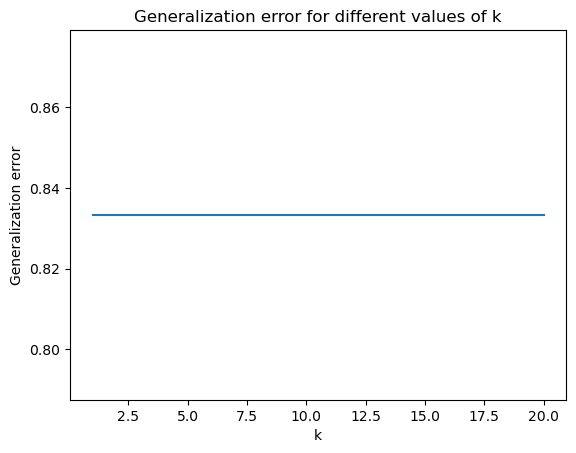

In [6]:
import matplotlib.pyplot as plt

k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 20]
errors = []

for k in k_values:
    knn = KnnClassifier(k=k)
    knn.train(iris_training_set)
    error = 1 - knn.test(iris_test_set)
    errors.append(error)
    
plt.plot(k_values, errors)
plt.xlabel('k')
plt.ylabel('Generalization error')
plt.title('Generalization error for different values of k')
plt.show()

Based on this plot, I am testing the k-NN classifier with the values of k from 1 to 20. The plotted values of k is on the x-axis and the generalization errors is on the y-axis.

## Identifying the ideal k value for this classifier, and justifying your selection by demonstrating a sound process 

In this chunk of code, I made it iterate over the values of k from 1 to 20 and train the k-NN classifier on the training set. It is able to compute and spit out the generalization error on the test set. The errors for each value of k is printed out.

In [7]:
best_k = None
best_error = float('inf')
for k in range(1, 20):
    knn = KnnClassifier(k)
    knn.train(iris_training_set)
    error = 1 - knn.test(iris_test_set)
    print(f"k = {k}, error = {error}")
    if error < best_error:
        best_k = k
        best_error = error

print(f"Best k = {best_k}, Best error = {best_error}")

k = 1, error = 0.8333333333333334
k = 2, error = 0.8333333333333334
k = 3, error = 0.8333333333333334
k = 4, error = 0.8333333333333334
k = 5, error = 0.8333333333333334
k = 6, error = 0.8333333333333334
k = 7, error = 0.8333333333333334
k = 8, error = 0.8333333333333334
k = 9, error = 0.8333333333333334
k = 10, error = 0.8333333333333334
k = 11, error = 0.8333333333333334
k = 12, error = 0.8333333333333334
k = 13, error = 0.8333333333333334
k = 14, error = 0.8333333333333334
k = 15, error = 0.8333333333333334
k = 16, error = 0.8333333333333334
k = 17, error = 0.8333333333333334
k = 18, error = 0.8333333333333334
k = 19, error = 0.8333333333333334
Best k = 1, Best error = 0.8333333333333334


After computing the best value of k, the best k is when k=1, and the best error is 0.8333333333333334. 

## Conclusion

Write a review of what you did, some key decisions you made along the way and why you made those decisions, the end result, and what you might do next or experiment with next to achieve a higher performing classifier.

### 💡 Knowledge Check Part 1

*I created a code that first splits the dataset into a training set and a test set using slicing notation. It then trains a k-NN classifier on the training set, and tests it with different values of k using a loop that iterates over the values of k. For each value of k, it trains the k-NN classifier on the training set and tests it on the test set, and then prints out the generalization error. The code then creates a plot of the generalization errors for different values of k using the matplotlib library. It then identifies the best k value for the classifier based on the lowest generalization error.* 

*One key decision I made was the choice of the spliting ratio between the training set and test set, which was set to 60/40. There are many popular options from what I've read such as; 80/20, 70/30, 95/5. Another decision was the choice of k values to test, which was set to a range of values from 1 to 20. I personally felt like 10 was too short, and 30 was a bit much.*

*The end result of the code is a plot that shows the generalization errors for different values of k, and the best k value for the classifier based on the lowest generalization error.* 

*On my next experiment in acheiving a higher performing classifier, I could play around with a much bigger set of values of k. I could use different split ratios between the training set and test set, or with different methods for splitting the dataset.*

# Part 2: Classifying Handwritten Digits

In this, the second, part of this notebook, we will build a classifier that can assign a label, 0 - 9, to images of hand-written digits. We'll use a preprocessed subset of the well-known [MNIST database of handwritten digits](https://en.wikipedia.org/wiki/MNIST_database). Take a moment now to familiarize yourself with the subject matter of this data set, and take a look at the properties of [the UCI ML hand-written digits dataset](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

## What to Do

We'll guide you one step at a time in this walkthrough of a k-NN workflow. Try out the code, answer the Knowledge Check questions along the way, and engage in a few challenges to exercise your understanding and have some fun.

## Problem Statement

We would like to "transform" sequences of handwritten digits into real numeric values that a computer can understand. For example, we would like a machine to be able to "read" a handwritten **8675309** and interpret each digit, resulting in the numeric string `8675309`. As such, we would like to construct a classifier that, as accurately as possible, can identify a visual representation of integers (pictures of handwritten numbers), and classify each image with one of ten labels: 0, 1, 2, 3, 4, 5, 6, 7, 8 or 9.

## Obtaining the data

For this experiment, we will get up and running quickly with [a subset of the MNIST data, bundled in the scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) library. First, let's import a typical toolkit of libraries, including pandas, matplotlib, and [scikit-learn](https://scikit-learn.org/stable/index.html).

```python
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
```

Here we are importing two essential libraries, and giving them aliases `pd`, `plt`, and importing the `load_digits` function, which will give use our data set.

Let's load the data into memory as well, assigning it to a variable.

```python
digits = load_digits(as_frame=True)
```

Note that `load_digits` returns a [Bunch](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch) object - not a pandas DataFrame. Review the [load_digits documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) to see what the attributes of our particular Bunch are. We pass `load_digits` the named argument `as_frame=True` up front now, so that we can access the data as a DataFrame later.


In [8]:
#import a typical toolkit of libraries, including pandas, matplotlib, and scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

#load the data into memory
digits = load_digits(as_frame=True)

## Exploring the Data

Let's investigate the description, shape, feature names, and target label names of the `data` set stored in the Bunch. We know about these attributes from the documentation of [`load_digits`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits). Try inspecting each of these properties one at a time.

```python
print(digits.DESCR)
digits.data.shape
digits.feature_names
digits.target_names

```


In [9]:
print(digits.DESCR)
digits.data.shape
digits.feature_names
digits.target_names

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 💡 Knowledge Check 1

1. How many individual handwritten characters are represented in the data set?

*There are 1797 individual handwritten characters represented in the data set*

2. How many dimensions are there, not counting the class label?

*There are 64 dimensions not counting the class label*

3. What do the dimensions of each record represent? (What does one row of data have to do with a handwritten digit?)

*The dimensions of each record represent the intensity of each 8x8 image of integer pixels. Each row of data contains information about one image of a digit, therefore each dimension of that one pixel is the brightness, where it applies to the optical character recognition application.*



#### Exploring the DataFrame

Now, let's access the data as a pandas DataFrame, for convenience and some quick summary stats.

```python
frame = digits.frame
frame
```

Here we are obtaining the DataFrame, and inspecting it within the notebook.


In [10]:
frame = digits.frame
frame

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


Let's investigate some summary statistics with `describe`.

```python
frame.describe()
```

In [11]:
frame.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


We know from `DESCR` that the pixel values range from 0 to 16, and our quick survey of `describe` seems to confirm this, so we'll move forward with our assumptions about the data set. (In addition, `DESCR` promises us that there are no missing values - the preprocessing work has been done.)

### 💡 Knowledge Check 2

Based on the summary statistics, what is interesting about attribute *pixel_0_0*, and what do those interesting qualities lead you to conclude? Please describe it in very approachable terms, regarding the handwritten images, that anyone can understand.

*Based on the summary statistics, what is interesting about attribute *pixel_0_0* is that it has a minimum value of 0 and a maximum value of 0. It also a value of 0 in the column itself across all statistics. What it means is that every image in the dataset will have a a blank or white pixel in that particular spot. If that is the case, it might not be useful to use in analysis.* 

## Visualize the Data

Let's take a visual look at one of the images. The `digits` Bunch has a property, `images`, that is an array of all of the raw image data. Let's access one image and visualize it on the screen.

```python
plt.gray()
plt.matshow(digits.images[0])
plt.show()
```


<Figure size 640x480 with 0 Axes>

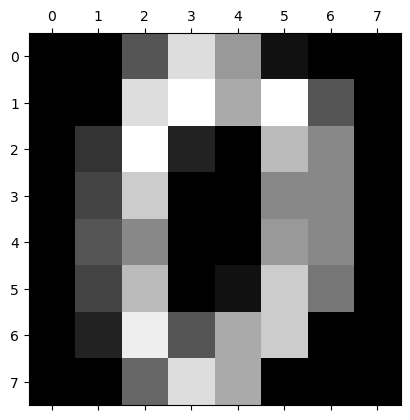

In [12]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

### 💡 Knowledge Check 3

1. The figure is drawn at a scale of 640x480 pixels, but how many pixels wide and tall are the actual character images?

*Based on the figure drawn at scale above, there are 8x8 pixels wide and tall*

2. What does this have to do with the dimensions of the data set?

*What this have to do with the dimensions is that each image in the dataset has 64 features that are individual pixel values, and it is important when we know how to analyze and process the data when looking at these individual pixel values.*

## Prepare the Training and Validation Sets

With preprocessing gratefully handled for us, we now turn to creating our training set and validation sets. While we could manually implement our own sampling technique, this time we will lean on the `sklearn.model_selection.train_test_split` method. Be sure to check out the documentation for [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)
```

Notice how we pass `train_test_split` two arrays: one array, `digits.data`, containing all of the attributes except the class label dimension, and a second array, `digits.target`, containing the class labels for each record in the data set. We also specify that we'd like to use 80% of the records for training, and 20% of the records for testing. (Here we are also assigning `0` to `random_state`, and this is only for the sake of this exercise, to control the random seed so that running our notebook repeatedly gives us the same, albeit randomized, sampling.)

The function `train_test_split` returns four arrays, conveniently splitting our complete data set into randomized training and validation sets:

- `X_train`: our training records, without the class labels
- `y_train`: the class labels for our training records
- `X_test`: our validation records, without the class labels
- `y_test`: the class labels for our validation records

This is a very common naming convention we see in practice, so we'll abide by it here.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

## Instantiate and "Train" our Classifier

We'll next instantiate a k-NN classifier provided by scikit-learn: the [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Please be sure to read the documentation, noticing both the parameters we can pass the KNeighborsClassifier initializer, such as the distance metric to use, and in particular, `n_neighbors` which is our **_k_**.

We'll rely on some defaults, but start with a fairly unsurprising **_k_**, the square root of the number of records in the training set.

```python
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = int(sqrt(len(X_train))))
```

Import the KNeighborsClassifier and instantiate it the next code cell.

In [14]:
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=int(sqrt(len(X_train))))


Next, we have to "train our model," but, as we know, k-NN classifiers are instance-based learners with no initial training computation. All we need to do is provide the classifier with the training data.

```python
classifier.fit(X_train, y_train)
```

Here we invoke the commonplace `fit` method found in tha API of many pre-built classification models. Here, we simply pass it our training data.

In [15]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=37)

### 💡 Knowledge Check 4

Using the documentation, investigate the other "nearest neighbor" classifiers in the scikit-learn library, in the `sklearn.neighbors` namespace. Identify (name) two other classifiers, and briefly describe how they are different from KNeighborsClassifier. Don't just regurgitate the documentation - do a little online sleuthing to see how they are useful, and share that information here.

*Based on what I found, two other nearest neighbor classifiers in the scikit-learn library are RadiusNeighborsClassifer and KNeighborsRegressor. The RadiusNeighborsClassifer is based on radius of points around an observation, and predicts the class of a test point based on the points within a fixed radius area. When finding the neighbors within a given radius of a point or points, it return the indices and distances of each point from the dataset lying in a ball with size radius around the points of the query array. Points lying on the boundary are included in the results.*
*I believe it is useful when the data is not well-defined or if there is a large amount of noise in the data.*

*KNeighborsRegressor seems to be a regression algorithm and it is use to predict a continious output variable. The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set. It also works by finding the k-nearest neighbors and taking the average as a predicted value. I believe it is useful when needing to predict a continious variable based on a set of input variables.*


## Validate (Test) Our Classifier

The next step in our ML process is to see how well our classifier performs, given our training set and, in this case, our initial **_k_**. We'll ask the classifier to predict the class label for every record in our validation set, `X_test`. Then, we'll compare those predictions with the actual class labels, in `y_test`, and compute an accuracy score. Rather than do this manually, we'll rely on the scikit-learn [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function. Be sure to read the documentation for `accuracy_score`.

```python
from sklearn.metrics import accuracy_score

y_predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_predictions)
```

Here we invoke the KNeighborsClassifier `predict` method, which returns an array of predicted class labels for each record in `X_test`, that we assign to `y_predictions`. We then pass `accuracy_score` the known correct class labels for the validation set, `y_test`, and the predicted labels, `y_predictions`, and let it make the comparisons, tally up the correct matches, and compute and return an accuracy score between 0 and 1.


In [16]:
from sklearn.metrics import accuracy_score

y_predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_predictions)

Now, let's inspect that accuracy score by simply printing it.

```python
print(accuracy)
```


In [17]:
print(accuracy)

0.9611111111111111


Hm - not bad!

There's one more way we can analyze the performance of our classifier: by inspecting a matrix of expected vs predicted class labels, known as a *confusion matrix*. For each cell in the matrix, we'll see the number of predictions, whether right or wrong, made for each of the known class labels.

We'll reach for the scikit-learn [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function to generate a confusion matrix for us.

```python
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predictions)
```

We import the `confusion_matrix` function, and then invoke it, passing it the expected class labels in the validation set, `y_test`, and the predicted labels, `y_predictions`. It returns, in essence, a matrix, which we assign to `confusion_matrix`.


In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predictions)


Now, let's inspect the confusion matrix by simply printing it.

```python
print(confusion_matrix)
```

In [19]:
print(confusion_matrix)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 1  0 32  1  0  0  0  1  1  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  3  0  1  0  0  1  1 33  0]
 [ 0  0  0  0  0  1  0  1  0 39]]


The horizontal axis of a confusion matrix represents the predicted labels, and the vertical axis represents the correct class labels. Each entry in the matrix represents the number of images predicted to have that class label.

Notice how well this classifer performed, with our default **_k_**, euclidean distance, and a (luckily!) high-quality data set. We can see the 27 of the **0** handwritten images are correctly classified, and none are misclassified. If we look at the last row in the confusion matrix, we see that 39 of the **9** images are correctly classified, but one was classified as a **5**, and another classified as a **7**.

### But, can you do better?

### 💡 Knowledge Check 5

Inspect the confusion matrix. Which handwritten letter seemed to be the "hardest" for our classifier to predict correctly? What evidence in the confusion matrix leads you to assert this?

*After analyzing the confusion matrix, it seems that the handwritten letter that seems to be the hardest for the classifer to predict correctly is digit 8. There seems to be more misclassifications than in any other row. multiple image of 8 was classified as 1, another one image was 3.*

## Tune the Classifier: Find the Best **_k_**

Now it's your turn. Given what we have seen in the course thus far, and the `sklearn` API seen in this notebook, create an iterative experiment that inspects the accuracy of different classifiers using different **_k_** values. Your goal is to configure a classifier that exhibits the highest possible accuracy. Start your experiment with the traditional initial **_k_**, the square root of the number of records in the training set.

Your experiment should demonstrate:

- Creating KNeighborsClassifiers with different **_k_** values
- "Training" and validating the classifiers
- Capturing and presenting the accuracy for each **_k_**

Keep your experiment simple. (Hint: Use a loop.)

Conclude your experiment with a markdown cell that asserts your proposed **_k_**, the accuracy of your classifier, and what leads you to choose this value of **_k_**.


In [20]:
# 💡 Knowledge Check 6 Code

# Your experiment begins here. Start with the "traditional" initial k.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Iterate over k values and train/validate classifiers
k_values = range(1, 21)
accuracies = []

for k in k_values:
    # Here I create a KNN classifier to use with different k values
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # use fit for training set
    knn.fit(X_train, y_train)
    
    # predicting labels for validation
    y_predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_predictions)
    
    # compute accuracy
    acc = accuracy_score(y_test, y_predictions)
    accuracies.append(acc)
    
 
    print(f"k={k}, accuracy={acc}")

k=1, accuracy=0.9888888888888889
k=2, accuracy=0.9805555555555555
k=3, accuracy=0.9833333333333333
k=4, accuracy=0.975
k=5, accuracy=0.975
k=6, accuracy=0.9722222222222222
k=7, accuracy=0.975
k=8, accuracy=0.975
k=9, accuracy=0.975
k=10, accuracy=0.9722222222222222
k=11, accuracy=0.9722222222222222
k=12, accuracy=0.9722222222222222
k=13, accuracy=0.9722222222222222
k=14, accuracy=0.9694444444444444
k=15, accuracy=0.9694444444444444
k=16, accuracy=0.9694444444444444
k=17, accuracy=0.9666666666666667
k=18, accuracy=0.9666666666666667
k=19, accuracy=0.9611111111111111
k=20, accuracy=0.9638888888888889


### 💡 Knowledge Check 6

Conclude your experiment with a brief assertion of your proposed **_k_**, the accuracy of your classifier, and what led you to choose this value of **_k_**.

After trying mutiple values of k up to 20, I believe that when k=1, then it can be seen as the optimal value for the classifier with a 0.9888 on a validation set. Since a k of 1 means that each point is assigned to the class of its closest neighbor in its training set, then it can be considered an appropriate choice due to my provided small data set. Overall, the data seems consistent with a high accuracy.


# Conclusion

Congratulations on finishing an authentic machine learning workflow! While our dataset is of high quality, and the drama of preprocessing is abbreviated, we hope that this notebook enables you to see how we can use ML tools to carry out much of the machine learning process.

Please wrap up this notebook with a brief narrative.

### 💡 Knowledge Check 7

Imagine that a "person on the street" (or your twelve-year-old relative) asks you, "What does it take for a computer to recognize handwritten characters that get scanned and turned into computable numbers?" Rely on our journey through this notebook, infer and deduce what you can as necessary, but be mindful of your audience: please explain things in a manner befitting someone who knows nothing about these things.

Conclude with your assertion about whether or not character recognition is an "easy" or "very difficult" machine learning problem, and whether or not this surprises you.

*For a computer to recognize handwritten characters, I would say that it learns similarly to the way we (humans) do. For example, I can write letters and numbers on paper and scan them with my eyes to process what I wrote. However, the computer will scan handwritten characters as a bunch of dots and lines. What I want the computer to do is to read what it just scanned and understand it by processing it as well.*

*For the computer to achieve this, the world would call it "machine learning". The computer will get a bunch of cool examples of handwritten letters and numbers and identify each one. It will learn how to recognize the different shapes and patterns that make up each letter or number. Once the computer has learned how to recognize the different shapes and patterns, it can use that knowledge to read new handwritten letters and numbers that it hasn't seen before.*

*Think of it as a game. When approaching a difficult level with a fixed amount of obstacles (monsters, traps, loot), the more we recognize where every obstacle is, the higher the chance of us avoiding anything that would make us fail to complete that level. By the end of that level, we can recognize that specific monster, trap, and all the loot locations. The end result is that we can beat that level due to acquiring knowledge about it and mastering it.*

*I would say that character recognition is a very difficult machine learning problem. Even with all the technology and techniques we have available, it can still be challenging to get a computer to recognize handwriting with high accuracy. However, with enough examples and careful training, we can get pretty good results, as we saw in our experiment.*
